In [4]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [356]:

import xlrd
import json
from datetime import datetime



ruta = "Temperatura.xls" #ruta relativa archivo excel
archivo = xlrd.open_workbook(ruta) #abro archivo excel
hoja = archivo.sheet_by_name("Temperatura") #seleccionar la hoja

temp = []
timestamp = []

lista = []
for i in range(hoja.nrows):
    try:
        temp.append(float(hoja.cell_value(i,1)))
        timestamp.append(hoja.cell_value(i,0))
        lista.append[i]
    except:
        pass   


datos = {}
datos["temp"]=temp[3000:4500]
datos["timestamp"]=timestamp[3000:4500]

muestra={}
muestra["indice"]=lista
muestra["temp"]=temp[3000:4000]








        


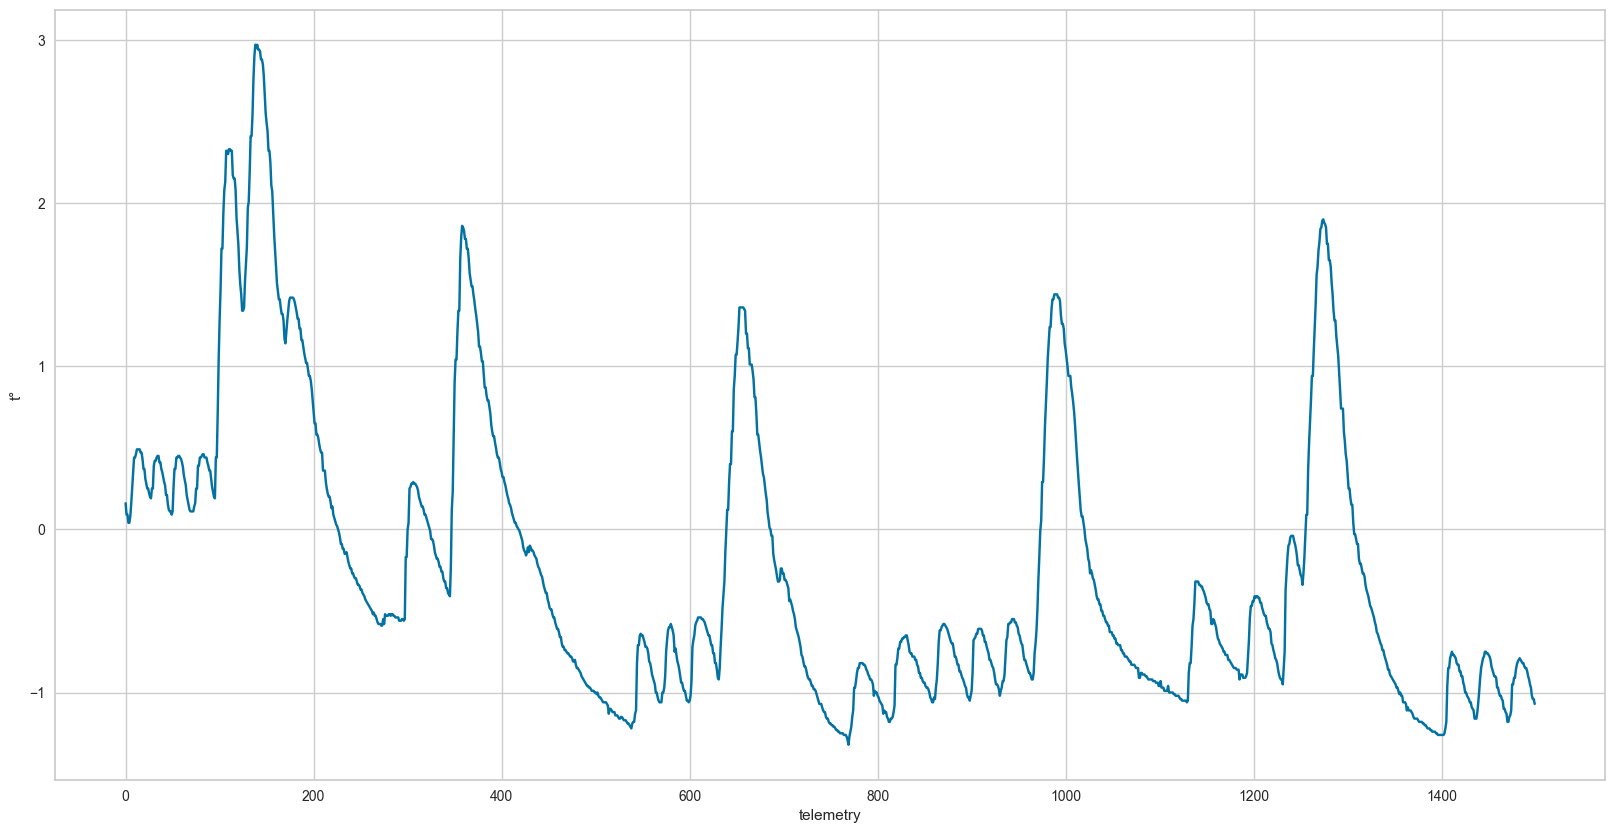

In [357]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.xlabel("telemetry")
plt.ylabel("t°")
plt.plot(datos["temp"])

In [358]:
# init setup
from pycaret.anomaly import *
s = setup(datos, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1500, 2)"
2,Transformed data shape,"(1500, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [188]:
# check list of available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [359]:
# train model
iforest = create_model('knn', fraction = 0.15)
iforest_results = assign_model(iforest)

iforest_results.head()
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [280]:
# check anomalies
iforest_results[iforest_results['Anomaly'] == 1].head()

,temp,timestamp,Anomaly,Anomaly_Score


In [360]:
import plotly.graph_objects as go
# plot value on y-axis and date on x-axis
fig = px.line(iforest_results, x=iforest_results.index, y="temp")
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [iforest_results.loc[i]['temp'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values , mode="markers",
                name = 'ciclo', 
                marker=dict(color='red',size=10)))
        
fig.show()

In [316]:
print(iforest_results["Anomaly"])

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Anomaly, Length: 1000, dtype: int32
